In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dados = pd.read_excel('/content/BaseDados_RegressaoLinear.xlsx')

In [9]:
dados.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [10]:
dados.shape

(99, 2)

In [11]:
dados.columns

Index(['Salario', 'Limite_Emprestimo'], dtype='object')

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [13]:
dados.isnull().sum()

Salario              0
Limite_Emprestimo    0
dtype: int64

In [14]:
dados.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [17]:
#transformando em array
Eixo_x = dados.iloc[:, 0].values
Eixo_y = dados.iloc[:, 1].values

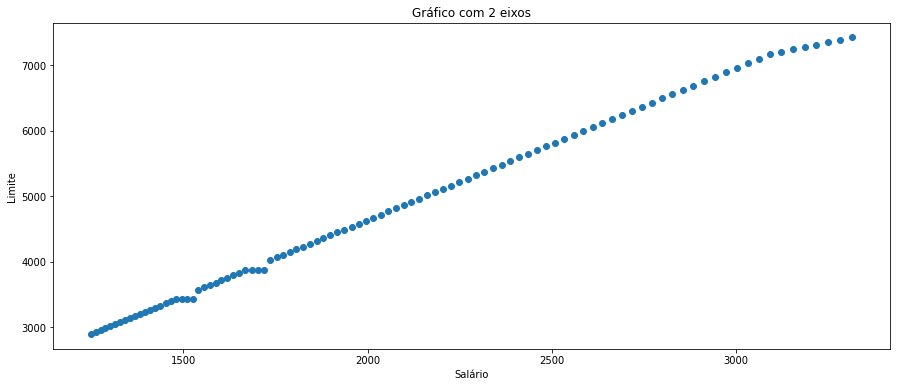

In [22]:
plt.figure( figsize=(15,6))
plt.title('Gráfico com 2 eixos')
plt.scatter(Eixo_x, Eixo_y)
plt.xlabel('Salário')
plt.ylabel('Limite');

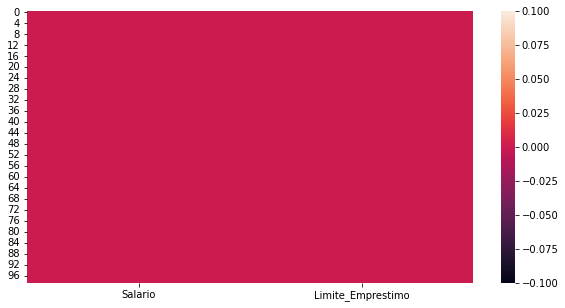

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(dados.isnull(), cbar=True);

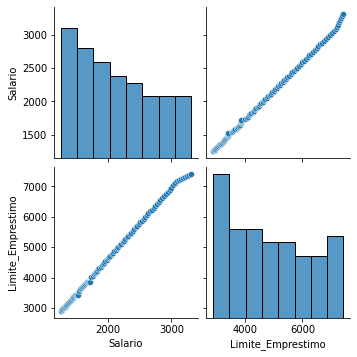

In [29]:
sns.pairplot( dados );

In [30]:
correlacao = np.corrcoef( Eixo_x, Eixo_y)
correlacao

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

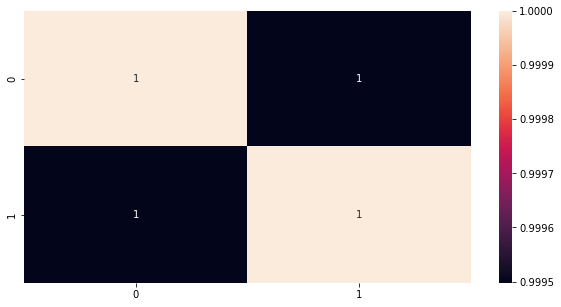

In [35]:
plt.figure( figsize=(10,5) )
sns.heatmap( correlacao, annot = True  );

In [36]:
Eixo_x = Eixo_x.reshape(-1, 1)
Eixo_y = Eixo_y.reshape(-1, 1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(Eixo_x, Eixo_y, test_size=0.20)

In [39]:
print(len(x_treinamento), len(x_teste))

79 20


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
funcao_regressao = LinearRegression()

In [42]:
funcao_regressao.fit(x_treinamento, y_treinamento)

LinearRegression()

In [43]:
funcao_regressao.score(x_treinamento, y_treinamento)

0.9988824093178341

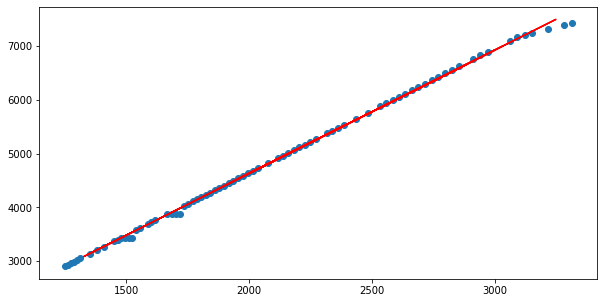

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(x_treinamento, y_treinamento)
plt.plot(x_teste, funcao_regressao.predict(x_teste), color='red')
plt.show()

In [48]:
previsoes = funcao_regressao.predict(x_teste)

from sklearn import metrics
print('RMS.E', np.sqrt( metrics.mean_squared_error(y_teste, previsoes)) )

RMS.E 39.92047809076133


In [50]:
print('teste de predição', funcao_regressao.predict([[1500]]))

teste de predição [[3479.35463945]]
